In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# Declare a Base using auto_map
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(autoload_with = engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(date_recent, "%Y-%m-%d") - dt.timedelta(days = 365) # Use Time Delta to find query date

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).order_by(Measurement.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_scores, columns=["date", "prcp"])
df.set_index('date', inplace=True)  # Switch index to be the date to make it simpler to plot

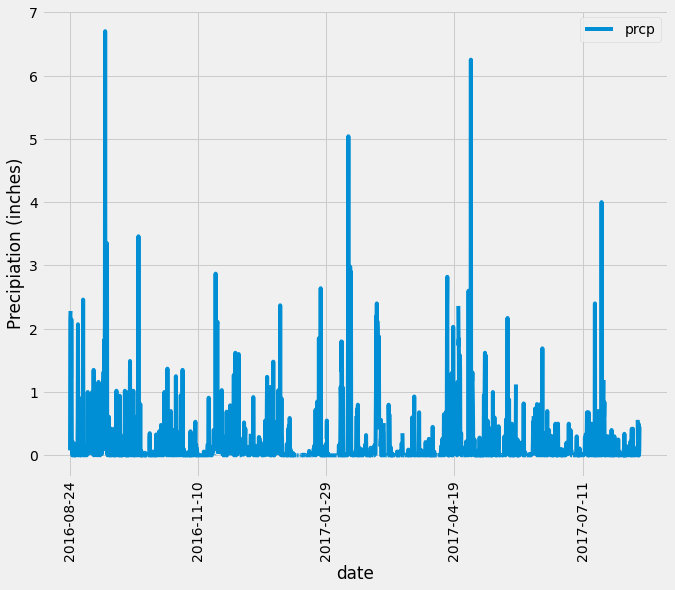

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1 = df.plot(figsize=(10,8))
plt.ylabel("Precipiation (inches)")
plt.xticks(rotation = "vertical")
plt.show()


In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = df.describe()
print(stats)

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(Station.station).group_by(Station.station).count()
print(f"The number of unique stations in the dataset is: {station_num}")

The number of unique stations in the dataset is: 9


In [74]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Turn station_activity into a dataframe
df_stations = pd.DataFrame(station_activity, columns = ["Station", "# of Measurements"])

In [112]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# First, save the most active station to a variable
most_active_station = station_activity[0][0]

# Run query where you filter by searching for tobs column for just the most active station
temp_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()[0]

# Print summary statement
print(f"At station {most_active_station}, the lowest temperature was {temp_data[0]}, the highest temperature was {temp_data[1]}, and the average was {round(temp_data[2], 1)}")

At station USC00519281, the lowest temperature was 54.0, the highest temperature was 85.0, and the average was 71.7


' \nNEED TO FIX THE BINS TO BE 12\n\n!\n!\n!\n!\n!\n\n\n\n'

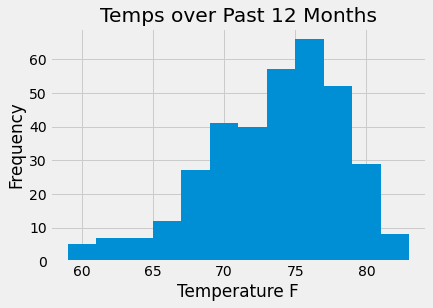

In [190]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
# Save the data as a df
df_most_active = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date > year_ago).order_by(Measurement.date).all(), columns = ["Date", "Temperature F"])
df_most_active.set_index("Date", inplace=True)  # set index to the dates

# Plot results as a histogram
df_most_active.hist(bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature F")
plt.title("Temps over Past 12 Months")


# Close session

In [ ]:
# Close Session
session.close()